<a href="https://colab.research.google.com/github/kfukutom/cmplxsys335/blob/main/kfukutom_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Degree distribution for class network

1a) Write a program to read the two files and assemble the network as a NetworkX DiGraph.
Then convert the directed network into an undirected one, such that if two nodes are connected by an edge in either direction (or both) in the directed network then they are connected by an edge in the undirected network.

In [62]:
# load and ensure the .csv and .txt file are properly read
from numpy import loadtxt, array
from csv import reader
import networkx as nx
from networkx.drawing.nx_pydot import pydot_layout

In [58]:
def readtxt(file):
    G = read_adjlist(file, nodetype=int, create_using=DiGraph)

    return G


def readcsv(file):
    with open(file, 'r') as csvfile:
        r = reader(csvfile)
        ls = []

        for students in r:
            students[0] = int(students[0])
            ls.append(students)

    return ls


def conversion(G):
    return G.to_undirected()

# Arg: Graph input, then we'll call on it's respective feature .degree(index)
def sizing(G):
    degrees = [100 * G.degree(i) for i in G]
    return degrees

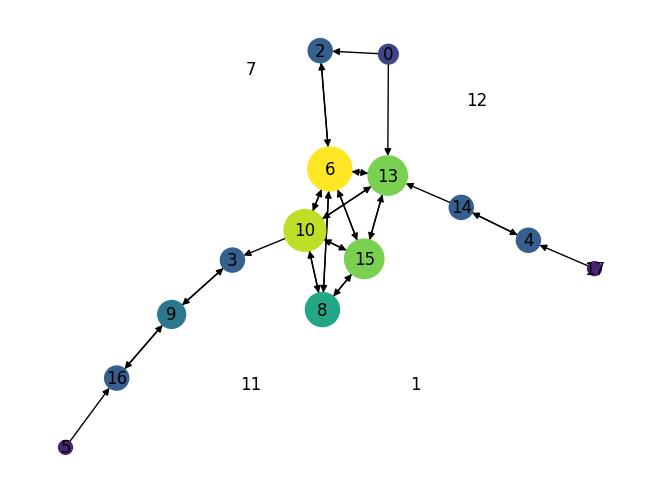

In [59]:
DiGraph = readtxt('classnet.txt')
lst = readcsv('classnames.csv')
sizes = sizing(DiGraph)
p = pydot_layout(DiGraph)
nx.draw(DiGraph, node_size=sizes, pos=p, with_labels=True, node_color=sizes)


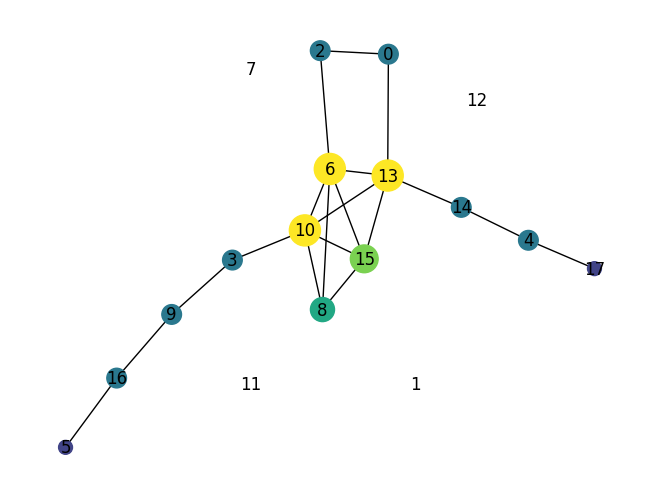

In [60]:
UndiGraph = conversion(DiGraph)
sizes = sizing(UndiGraph)
p = pydot_layout(UndiGraph)
nx.draw(UndiGraph, node_size=sizes, pos=p, with_labels=True, node_color=sizes)

1b) Add code to make a graph of the histogram of node degrees—the degree distribution of the
network.

We could assume that most people know around 1 to 3 people in the class.


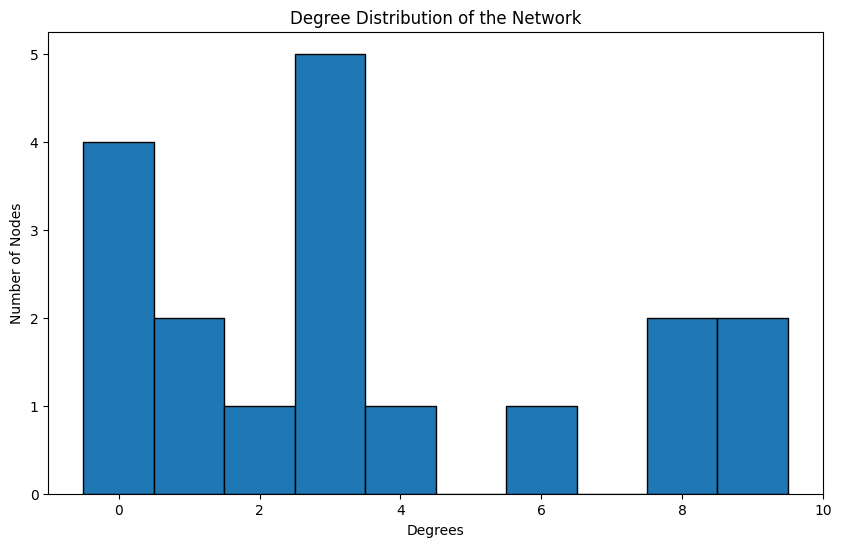

In [76]:
# start of 1b
from pylab import hist
import matplotlib.pyplot as plt

degrees = [degree for node, degree in DiGraph.degree]
plt.figure(figsize=(10, 6))
hist(degrees, align='left', edgecolor='black')
plt.title('Degree Distribution of the Network')
plt.xlabel('Degrees')
plt.ylabel('Number of Nodes')
print('We could assume that most people know around 1 to 3 people in the class.')

1c) Make a new version of the program that does a visualization of the network with node size proportional to degree plus 1.
Why degree plus 1? What could go wrong if sizes were just proportional to degree?

Adding 1 to each degree ensures that even isolated nodes are still visible on the graph, preventing them from being disregarded from the diagram entirely.


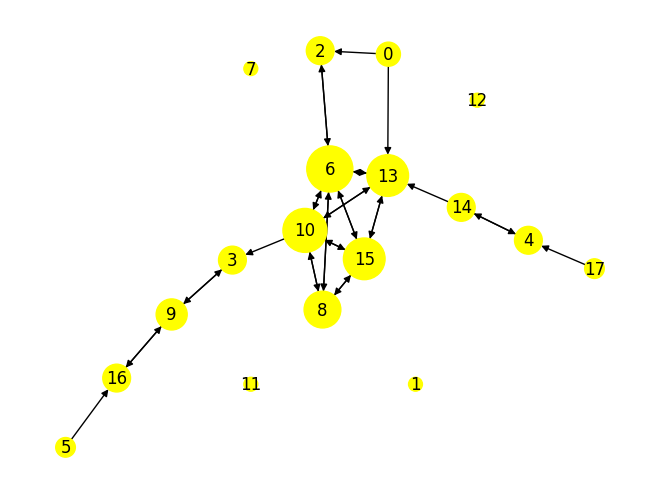

In [84]:
# Proportional to Degree Size + 1
G = readtxt('classnet.txt')

def proportional(G):
  degrees = [degree for node, degree in G.degree()]
  sizes = [(degree + 1) * 100 for degree in degrees]
  p = pydot_layout(G)
  nx.draw(G, p, with_labels=True, node_size=sizes, node_color='yellow')

proportional(G)
print("Adding 1 to each degree ensures that even isolated nodes are still visible on the graph, preventing them from being disregarded from the diagram entirely.")

1d) Make a **third** version that produces a visualization of the directed network with node size
proportional to in-degree

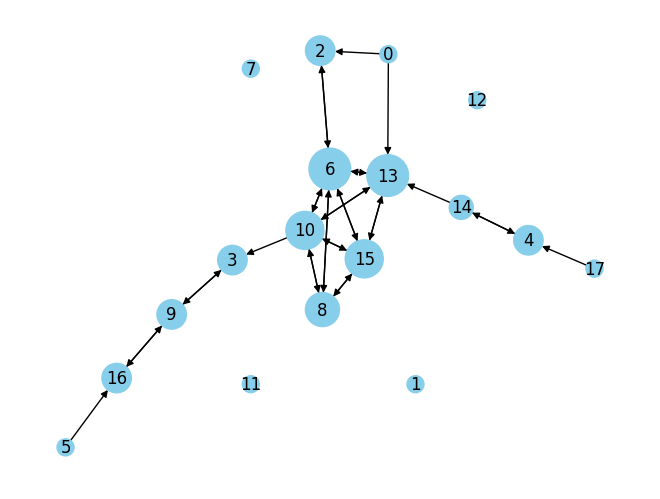

In [87]:
def inGraph(G):
  in_degrees = [G.in_degree(node) for node in G.nodes()]
  sizes = [(i + 1) * 150 for i in in_degrees]
  p = pydot_layout(G)
  nx.draw(G, p, with_labels=True, node_size=sizes, node_color='skyblue')

inGraph(G)

#2 Long-tailed distributions

#3 Centrality measures for class network

3a) Compute the eigenvector centrality for all nodes in the undirected version of the network,
from first principles using the power method (i.e., not using the function in NetworkX).

In [88]:
# Eigenvector Centrality
# Requires: classnet.txt, classnames.csv

# Remeber Kappa = (1/n) * (Sum of x-sub(i))
# Step 1: READ THE FILE
from numpy import ones, zeros, mean
from csv import reader
from networkx import read_adjlist, draw
G = read_adjlist('classnet.txt', nodetype=int)

# Step 2: Calculate Eigenvector Centrality
# ASSUME an initial guess (e.g., 1) and then each person will guess their scores, normalizing it eventually.
n = G.number_of_nodes()
A = ones(n, float)

for i in range(25):
  x_prime = zeros(n, float)

  for node in G:
    for neighbor in G[node]:
       # G[x] is a dictionary, and it contains neighbors
       x_prime[node] += A[neighbor]

  # Let's normalize the eigenvector centrality after each iteration
  kappa = mean(x_prime)
  A = x_prime / kappa


r = reader(open('classnames.csv', 'r'))
names = []
for data in r:
  names.append(data[0:3])

for i in G:
  print(names[i], "||", A[i], "||")
#print(max(A), min(A))

['0', 'Beyer', 'Kurt'] || 0.9604443406193051 ||
['2', 'Fu', 'Yujian'] || 1.026906402769105 ||
['13', 'Tian', 'Rongxuan'] || 2.7160208990105406 ||
['1', 'Doyle', 'James'] || 0.0 ||
['6', 'Kluge', 'James'] || 3.0414892412071928 ||
['3', 'Guo', 'Michael'] || 0.8287814609827372 ||
['9', 'Shah', 'Priya'] || 0.22879415973634384 ||
['4', 'Jiang', 'Michael'] || 0.20595866240235222 ||
['14', 'Truntaev', 'Kirill'] || 0.7497871217758125 ||
['5', 'Keaney', 'Nora'] || 0.016126780298557467 ||
['16', 'Voit', 'Angela'] || 0.0628473479404109 ||
['8', 'Rockmore', 'Shayna'] || 2.277171034535251 ||
['10', 'Steller', 'Cheops'] || 3.0010315185212173 ||
['15', 'Vlasceanu', 'Denisa'] || 2.8317915588821747 ||
['7', 'Maendel', 'Gavin'] || 0.0 ||
['11', 'Szentgyorgyi', 'Lucas'] || 0.0 ||
['12', 'Tamura', 'Himari'] || 0.0 ||
['17', 'Yao', 'Tianyong'] || 0.05284947131900019 ||


3b) Compute **PageRank** (with 𝛼 = 0.85) for all nodes in the directed version from first principles
(not using the function in NetworkX).

In [94]:
# PageRank, VERY Interesting Search Engine Algorithmn by Mr. Larry Page himself.
from networkx import DiGraph, read_adjlist
import numpy as np

G = read_adjlist("classnet.txt", nodetype=int, create_using=DiGraph)
N = G.number_of_nodes()
A = ones(N, float)
ALPHA = 0.85 # <-- Functions as a damping factor

for i in range(25):
    x_prime = zeros(N, float)

    for node in G:
        s = 0

        for neighbor in G.predecessors(node):
            out_degree = G.out_degree(neighbor)
            if out_degree > 0:

                s += A[neighbor] / out_degree

        x_prime[node] = (ALPHA * s + 1)

    A = x_prime

for i in G:
  print(names[i], "||", A[i])

#print(ALPHA, " ", N)

['0', 'Beyer', 'Kurt'] || 1.0
['2', 'Fu', 'Yujian'] || 3.3421622168324427
['13', 'Tian', 'Rongxuan'] || 8.37473314091832
['1', 'Doyle', 'James'] || 1.0
['6', 'Kluge', 'James'] || 11.293761148637145
['3', 'Guo', 'Michael'] || 9.45806488828903
['9', 'Shah', 'Priya'] || 16.445275077931157
['4', 'Jiang', 'Michael'] || 3.561637480074149
['14', 'Truntaev', 'Kirill'] || 4.027386504740868
['5', 'Keaney', 'Nora'] || 1.0
['16', 'Voit', 'Angela'] || 8.802826001725043
['8', 'Rockmore', 'Shayna'] || 6.238095660844172
['10', 'Steller', 'Cheops'] || 8.867743651308123
['15', 'Vlasceanu', 'Denisa'] || 8.557287980424372
['7', 'Maendel', 'Gavin'] || 1.0
['11', 'Szentgyorgyi', 'Lucas'] || 1.0
['12', 'Tamura', 'Himari'] || 1.0
['17', 'Yao', 'Tianyong'] || 1.0


In [93]:
# Confirm
%%capture
p = pydot_layout(G)
draw(G, p, with_labels=True)

3c) Calculate betweenness **and** closeness centralities for **all** nodes in the undirected network using the functions in NetworkX.

> Reminder, use the provided NetworkX functions and methods for this one.



In [115]:
G = nx.read_adjlist('classnet.txt', nodetype=int, create_using=nx.Graph) # UNDIRECTED
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)

print(f"Betweenness Centrality:")
print("------------------------")
for item in betweenness.items():
  print(item)

print("\nCloseness Centrality:")
print("------------------------")
for item in closeness.items():
  print(item)


Betweenness Centrality:
------------------------
(0, 0.014705882352941176)
(2, 0.005514705882352941)
(13, 0.2738970588235294)
(1, 0.0)
(6, 0.07965686274509803)
(3, 0.22058823529411764)
(9, 0.16176470588235295)
(4, 0.08823529411764705)
(14, 0.16176470588235295)
(5, 0.0)
(16, 0.08823529411764705)
(8, 0.0)
(10, 0.27634803921568624)
(15, 0.011642156862745097)
(7, 0.0)
(11, 0.0)
(12, 0.0)
(17, 0.0)

Closeness Centrality:
------------------------
(0, 0.261609907120743)
(2, 0.2485294117647059)
(13, 0.3550420168067227)
(1, 0.0)
(6, 0.33137254901960783)
(3, 0.3012477718360071)
(9, 0.242467718794835)
(4, 0.21611253196930943)
(14, 0.27614379084967317)
(5, 0.15779645191409894)
(16, 0.1949250288350634)
(8, 0.27614379084967317)
(10, 0.36819172113289755)
(15, 0.3206831119544592)
(7, 0.0)
(11, 0.0)
(12, 0.0)
(17, 0.17139959432048682)


3d) List the top three winners for each of the four centrality measures. Comment briefly on your findings.

> **Eigenvector Centrality**: *James Kluge, Cheops Steller, Denisa Vlasceanu*
<p>
  To briefly comment my findings for the eigenvector centrality measure, I noted down that the algorithm did indeed give nodes that are more well connected to ones that had two or more mutuals/connections, the benefit when 'ranking' their importance in the network. Not surprisingly, this measure of centrality did indeed cluster around the middle of the network where there seems to be many connections with mutual, in and out-degrees.
</p>

> **PageRank Centrality** *Priya Shah, Michael Guo, Cheops Steller*
<p>
  I found the PageRank system particularly interesting. Unlike the results from the eigenvector centrality method, PageRank showed a stronger preference for three specific connected nodes. Cheops had the most connections, but it was their connections to Michael Guo and Priya Shah that made them more relevant within the network. This suggests that knowing individuals who are well-connected to the rest of the class increases a node's importance in the network, even if the node itself doesn't have the most direct connections.
</p>

> **Betweenness Centrality** *Cheops Steller, Michael Guo, Priya Shah*
<p>
  Interestingly, I noticed that the same set of individuals identified in the PageRank algorithm also appears in the betweenness centrality results. However, in this case, the order of each individual's "connectedness" makes more intuitive sense. It descends from the person with the most strategic connections within the network to those with fewer, reflecting the "betweenness" nature of the metric. Betweenness centrality measures how often a node acts as a bridge along the shortest path between other nodes, so individuals with higher scores are crucial for the flow of information or influence within the network. This means that individuals with high betweenness centrality are not just well-connected, but they also serve as key intermediaries between different groups
</p>

> **Closeness Centrality** *Cheops Steller, Rongxuan Tian, James Kluge*
<p>
  I observed that the individuals ranked highly in closeness centrality tend to form the core of the inner cluster within the network. As the name suggests, closeness centrality highlights individuals who are, on average, closer to all other nodes in terms of the shortest paths.
</p>


#4 Centrality measures for airline network

#5 Reciprocity